In [27]:
import random
import json
import pickle
import numpy as np
import nltk
from nltk.stem import WordNetLemmatizer
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Dropout, Embedding, Bidirectional, LSTM, Input, Attention, Flatten, Concatenate  
from keras.optimizers import SGD
import gensim.models
import matplotlib.pyplot as plt

In [28]:
lemmatizer = WordNetLemmatizer()

In [29]:
w2v_model = gensim.models.Word2Vec.load("data/output/gram.model")

In [30]:

intents = json.loads(open('data/input/intents.json').read())

In [31]:
words = []
classes = []
documents = []
ignore_letters = ['?', '!', '.', ',']

In [32]:
for intent in intents['intents']:
    for pattern in intent['patterns']:
        word_list = nltk.word_tokenize(pattern)
        words.extend(word_list)
        documents.append((word_list, intent['tag']))
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

In [33]:
words = [lemmatizer.lemmatize(word.lower()) for word in words if word not in ignore_letters]
words = sorted(set(words))

classes = sorted(set(classes))

In [34]:
pickle.dump(words, open('data/output/Attention/words.pkl', 'wb'))
pickle.dump(classes, open('data/output/Attention/classes.pkl', 'wb'))


In [35]:
training = []
output_empty = [0] * len(classes)

for document in documents:
    bag = []
    word_patterns = document[0]
    word_patterns = [lemmatizer.lemmatize(word.lower()) for word in word_patterns]
    for word in words:
        bag.append(1) if word in word_patterns else bag.append(0)

    output_row = list(output_empty)
    output_row[classes.index(document[1])] = 1
    training.append([bag, output_row])

random.shuffle(training)

In [36]:
# Separate train_x and train_y
train_x = np.array([item[0] for item in training])
train_y = np.array([item[1] for item in training])

In [37]:
input_layer = Input(shape=(len(train_x[0]),))
embedding_layer = Embedding(input_dim=len(words), output_dim=100)(input_layer)
lstm_layer = Bidirectional(LSTM(130, return_sequences=True))(embedding_layer)
attention1 = Attention()([lstm_layer, lstm_layer])
attention1 = Flatten()(attention1)
lstm_layer2 = Bidirectional(LSTM(130, return_sequences=True))(lstm_layer)
attention2 = Attention()([lstm_layer2, lstm_layer2])
attention2 = Flatten()(attention2)
concatenated_attention = Concatenate()([attention1, attention2])
output_layer = Dense(len(train_y[0]), activation='softmax')(concatenated_attention)

model = Model(inputs=[input_layer], outputs=[output_layer])

In [38]:
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])


In [39]:
# Train the model and store the history
history = model.fit(train_x, train_y, epochs=1500, batch_size=16, verbose=1)


Epoch 1/1500


c:\Users\ACER\Desktop\Mayabati---Your-Personal-AI-Chef\.venv\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_10']
Received: inputs=Tensor(shape=(None, 142))
  warnings.warn(msg)


7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 273ms/step - accuracy: 0.1464 - loss: 2.3779
Epoch 2/1500
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 253ms/step - accuracy: 0.1724 - loss: 2.1957
Epoch 3/1500
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 250ms/step - accuracy: 0.1777 - loss: 2.2390
Epoch 4/1500
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 258ms/step - accuracy: 0.2551 - loss: 2.1353
Epoch 5/1500
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 268ms/step - accuracy: 0.1958 - loss: 2.1948
Epoch 6/1500
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 266ms/step - accuracy: 0.2255 - loss: 2.1639
Epoch 7/1500
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 274ms/step - accuracy: 0.1538 - loss: 2.2041
Epoch 8/1500
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 264ms/step - accuracy: 0.1427 - loss: 2.2027
Epoch 9/1500
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 238ms/step - accuracy: 0.1398 - loss: 2.1614
Epoch 10/1500
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 236ms/step - accuracy: 0.1752 - loss: 2.0909
Epoch 11/1500
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 254ms/step - accuracy: 0.1988 - loss: 2.1760
Epoch 12/1500
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 261ms/step - accuracy: 

In [40]:
# Save the model
model.save('data/output/Attention/Rasika.keras')

In [41]:
# Print "Done"
print("Done")

Done


In [42]:
# Plot training history
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

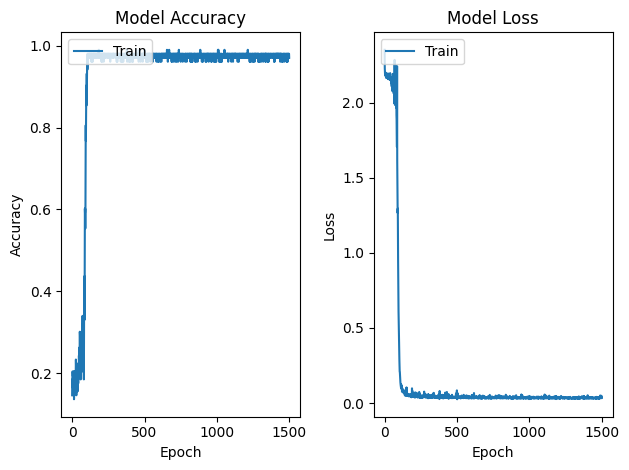

In [43]:
# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train'], loc='upper left')

# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train'], loc='upper left')

# Show plots
plt.tight_layout()
plt.show()
